In [1]:
import warnings
warnings.filterwarnings('ignore')

## 1. Data understanding and exploration

In [2]:
#import libraries
import pandas as pd
import numpy as np

In [3]:
#importing dataset
dataset = pd.read_csv("BoomBikes.csv")
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
dataset.shape

(730, 16)

In [5]:
dataset.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [6]:
dataset.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [8]:
#Assigning string values to different seasons instead of numeric values
#1=Spring
dataset.loc[(dataset['season']==1),'season']='spring'

#2=Summer
dataset.loc[(dataset['season']==2),'season']='summer'

#3=fall
dataset.loc[(dataset['season']==3),'season']='fall'

#4=winter
dataset.loc[(dataset['season']==4),'season']='winter'


In [9]:
dataset['season'].astype('category').value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [10]:
#0=2018, 1=2019:Year
dataset['yr'].astype('category').value_counts()

yr
0    365
1    365
Name: count, dtype: int64

In [11]:
#assigning string values to different months instead of numeric values
def object_map_mnths(x):
  return x.map({1: 'Jan',2: 'Feb',3: 'Mar',4: 'Apr',5: 'May',6: 'Jun',7: 'Jul',8: 'Aug',9: 'Sep',10: 'Oct',11: 'Nov',12: 'Dec'})

In [12]:
dataset[['mnth']]=dataset[['mnth']].apply(object_map_mnths)

In [13]:
dataset['mnth'].astype('category').value_counts()


mnth
Aug    62
Dec    62
Jan    62
Jul    62
Mar    62
May    62
Oct    62
Apr    60
Jun    60
Nov    60
Sep    60
Feb    56
Name: count, dtype: int64

In [14]:
dataset['holiday'].astype('category').value_counts()

holiday
0    709
1     21
Name: count, dtype: int64

In [15]:
def str_map_weekday(x):
  return x.map({1: 'Mon',2: 'Tue',3: 'Wed',4: 'Thurs',5: 'Fri',6: 'Sat',0: 'Sun'})

In [16]:
dataset[['weekday']]=dataset[['weekday']].apply(str_map_weekday)

In [17]:
dataset['weekday'].astype('category').value_counts()

weekday
Mon      105
Sat      105
Sun      105
Fri      104
Thurs    104
Tue      104
Wed      103
Name: count, dtype: int64

In [18]:
dataset['workingday'].astype('category').value_counts()

workingday
1    499
0    231
Name: count, dtype: int64

In [19]:
#1=clear,few clouds,partly cloudly
dataset.loc[(dataset['weathersit']==1),'weathersit']='A'

#2=mist,cloudy
dataset.loc[(dataset['weathersit']==2),'weathersit']='B'

#3=light snow,heavy rain
dataset.loc[(dataset['weathersit']==3),'weathersit']='C'



In [20]:
dataset['weathersit'].astype('category').value_counts()

weathersit
A    463
B    246
C     21
Name: count, dtype: int64

## 2.Data visualisation

In [21]:
#importing libraries
import matplotlib.pyplot as plt
import seaborn as sns

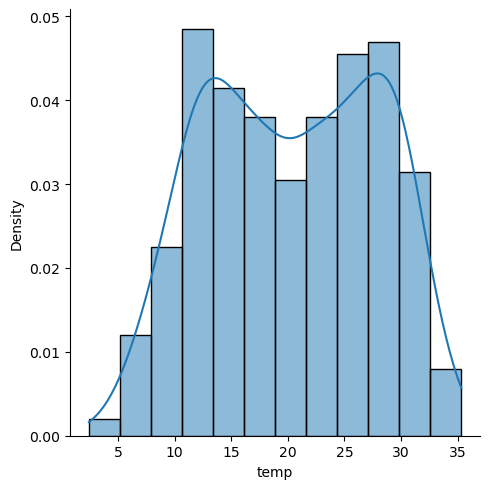

In [22]:
#temperature
sns.displot(dataset['temp'], stat="density",kde=True)

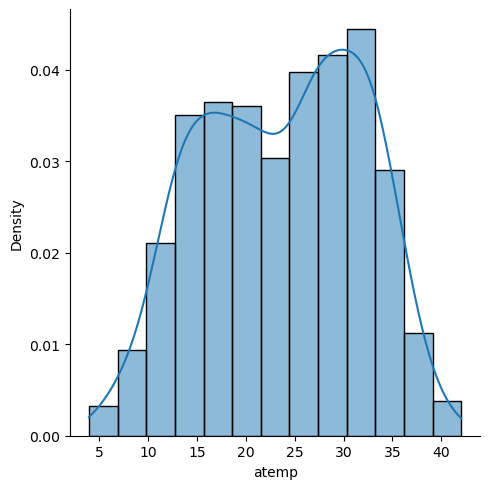

In [23]:
#actual temperature
sns.displot(dataset['atemp'], stat="density",kde=True)

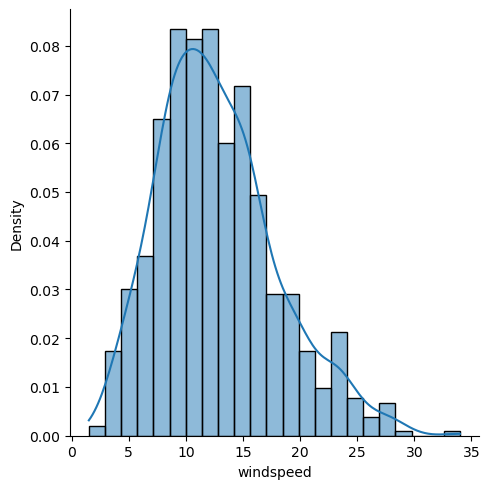

In [24]:
#wind speed
sns.displot(dataset['windspeed'], stat="density",kde=True)

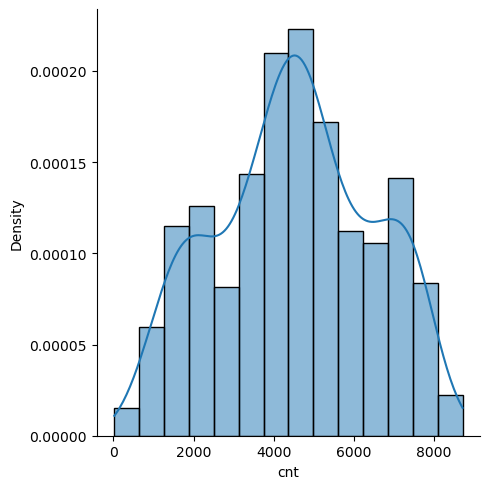

In [25]:
#target variable:count of total rental bikes including both casual and registered
sns.displot(dataset['cnt'], stat="density",kde=True)

In [27]:
#converting date to datetime format
dataset['dteday'] = pd.to_datetime(dataset['dteday'], format='%d-%m-%Y')

In [28]:
dataset_categorical = dataset.select_dtypes(exclude=['float64','datetime64','int64'])

In [29]:
dataset_categorical.columns

Index(['season', 'mnth', 'weekday', 'weathersit'], dtype='object')

In [30]:
dataset_categorical

,season,mnth,weekday,weathersit
0,spring,Jan,Sat,B
1,spring,Jan,Sun,B
2,spring,Jan,Mon,A
3,spring,Jan,Tue,A
4,spring,Jan,Wed,A
...,...,...,...,...
725,spring,Dec,Thurs,B
726,spring,Dec,Fri,B
727,spring,Dec,Sat,B
728,spring,Dec,Sun,A


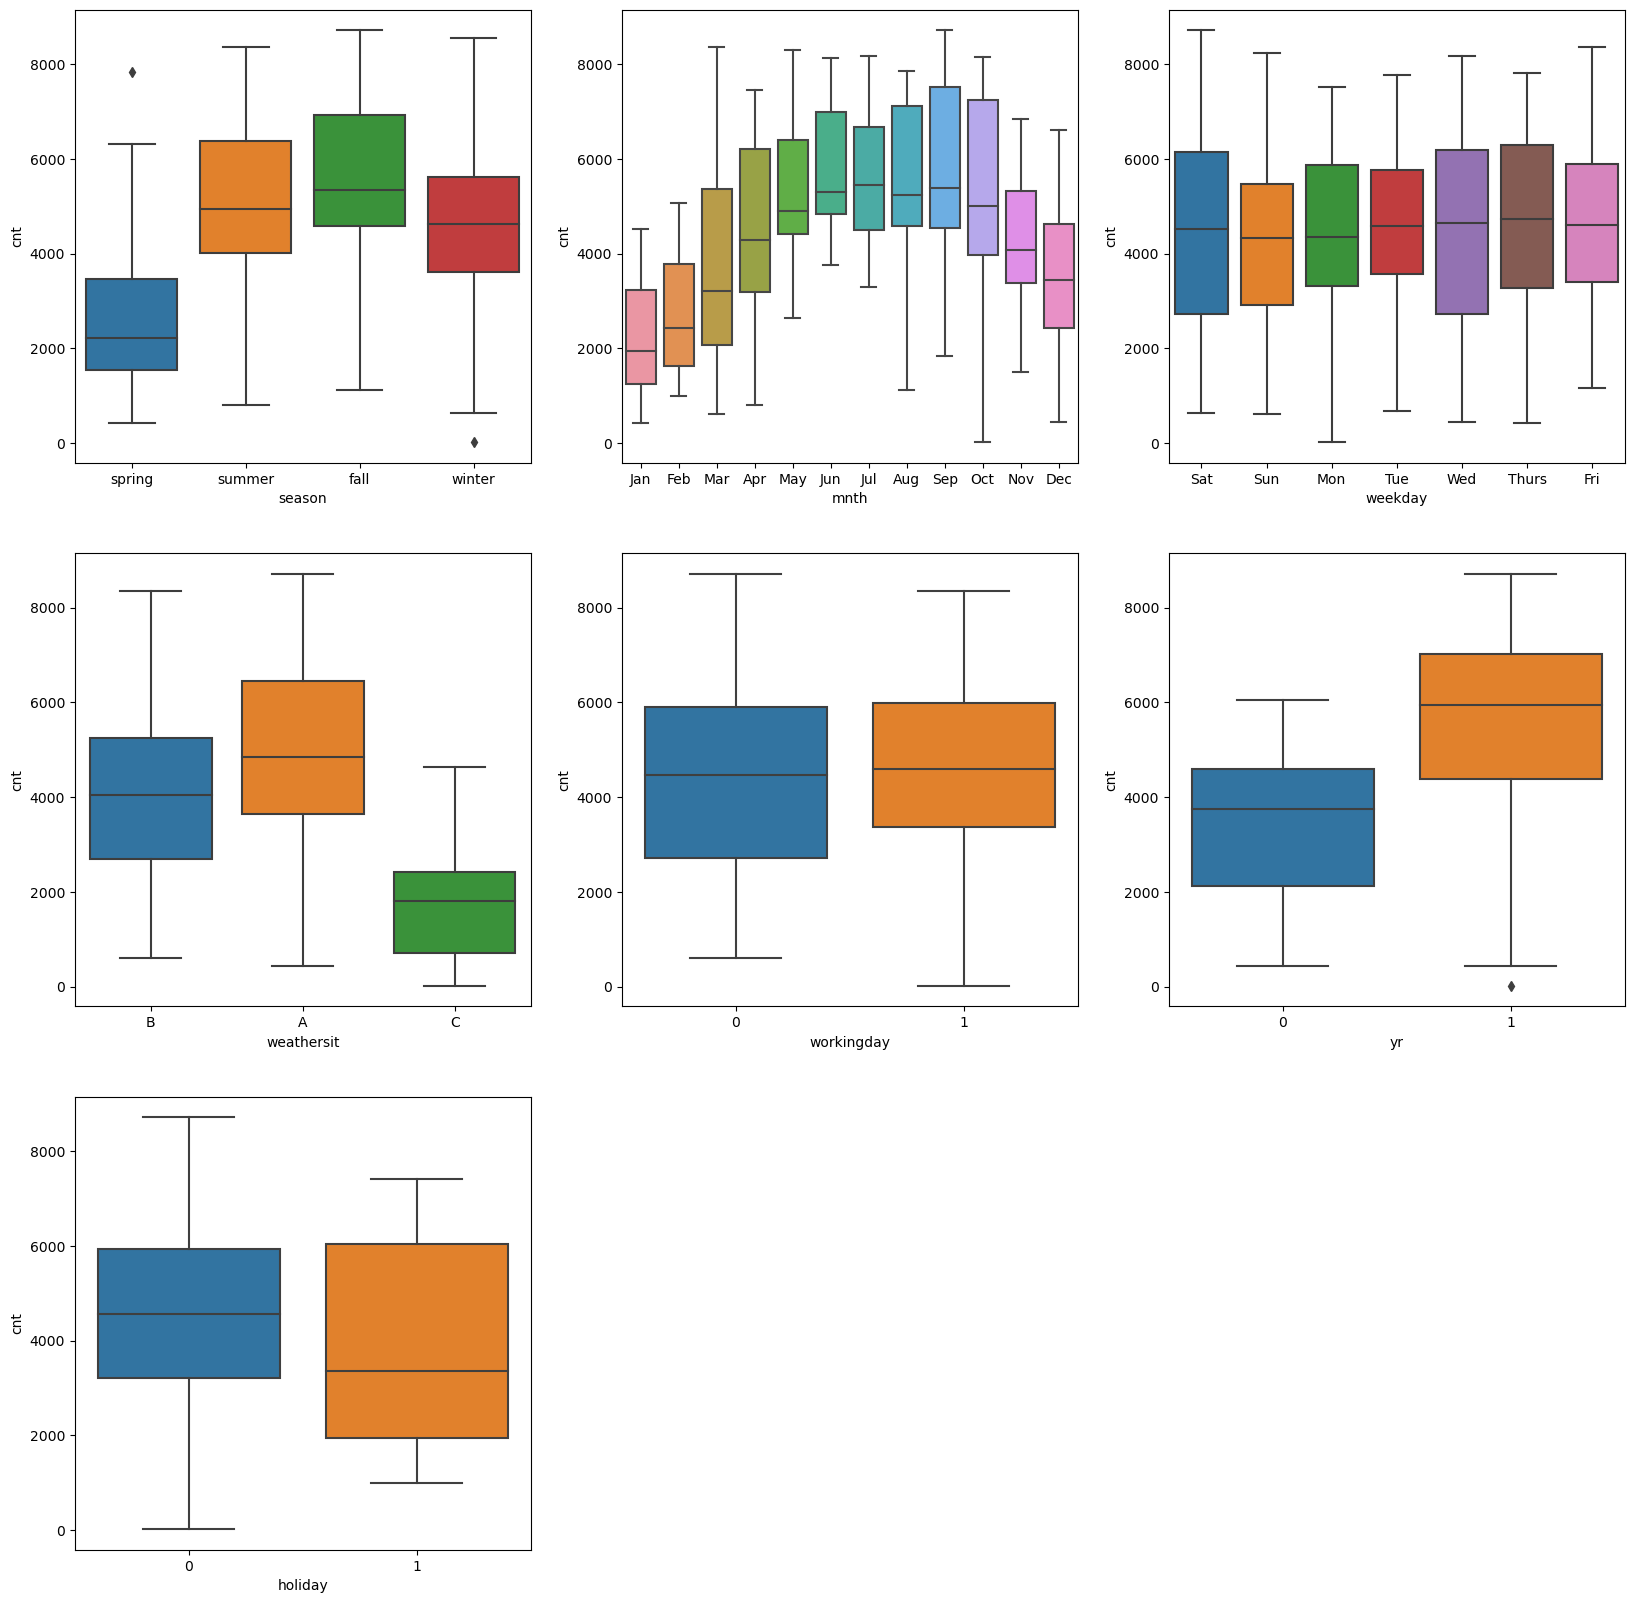

In [31]:
plt.figure(figsize=(20,20))
plt.subplot(3,3,1)
sns.boxplot(x='season',y='cnt',data=dataset)
plt.subplot(3,3,2)
sns.boxplot(x='mnth',y='cnt',data=dataset)
plt.subplot(3,3,3)
sns.boxplot(x='weekday',y='cnt',data=dataset)
plt.subplot(3,3,4)
sns.boxplot(x='weathersit',y='cnt',data=dataset)
plt.subplot(3,3,5)
sns.boxplot(x='workingday',y='cnt',data=dataset)
plt.subplot(3,3,6)
sns.boxplot(x='yr',y='cnt',data=dataset)
plt.subplot(3,3,7)
sns.boxplot(x='holiday',y='cnt',data=dataset)
plt.show()

In [32]:
intVarlist=["casual","registered","cnt"]
for var in intVarlist:
  dataset[var]=dataset[var].astype("float")

In [33]:
dataset_numeric=dataset.select_dtypes(include=['float64'])
dataset_numeric.head()

,temp,atemp,hum,windspeed,casual,registered,cnt
0,14.110847,18.18125,80.5833,10.749882,331.0,654.0,985.0
1,14.902598,17.68695,69.6087,16.652113,131.0,670.0,801.0
2,8.050924,9.47025,43.7273,16.636703,120.0,1229.0,1349.0
3,8.200000,10.60610,59.0435,10.739832,108.0,1454.0,1562.0
4,9.305237,11.46350,43.6957,12.522300,82.0,1518.0,1600.0


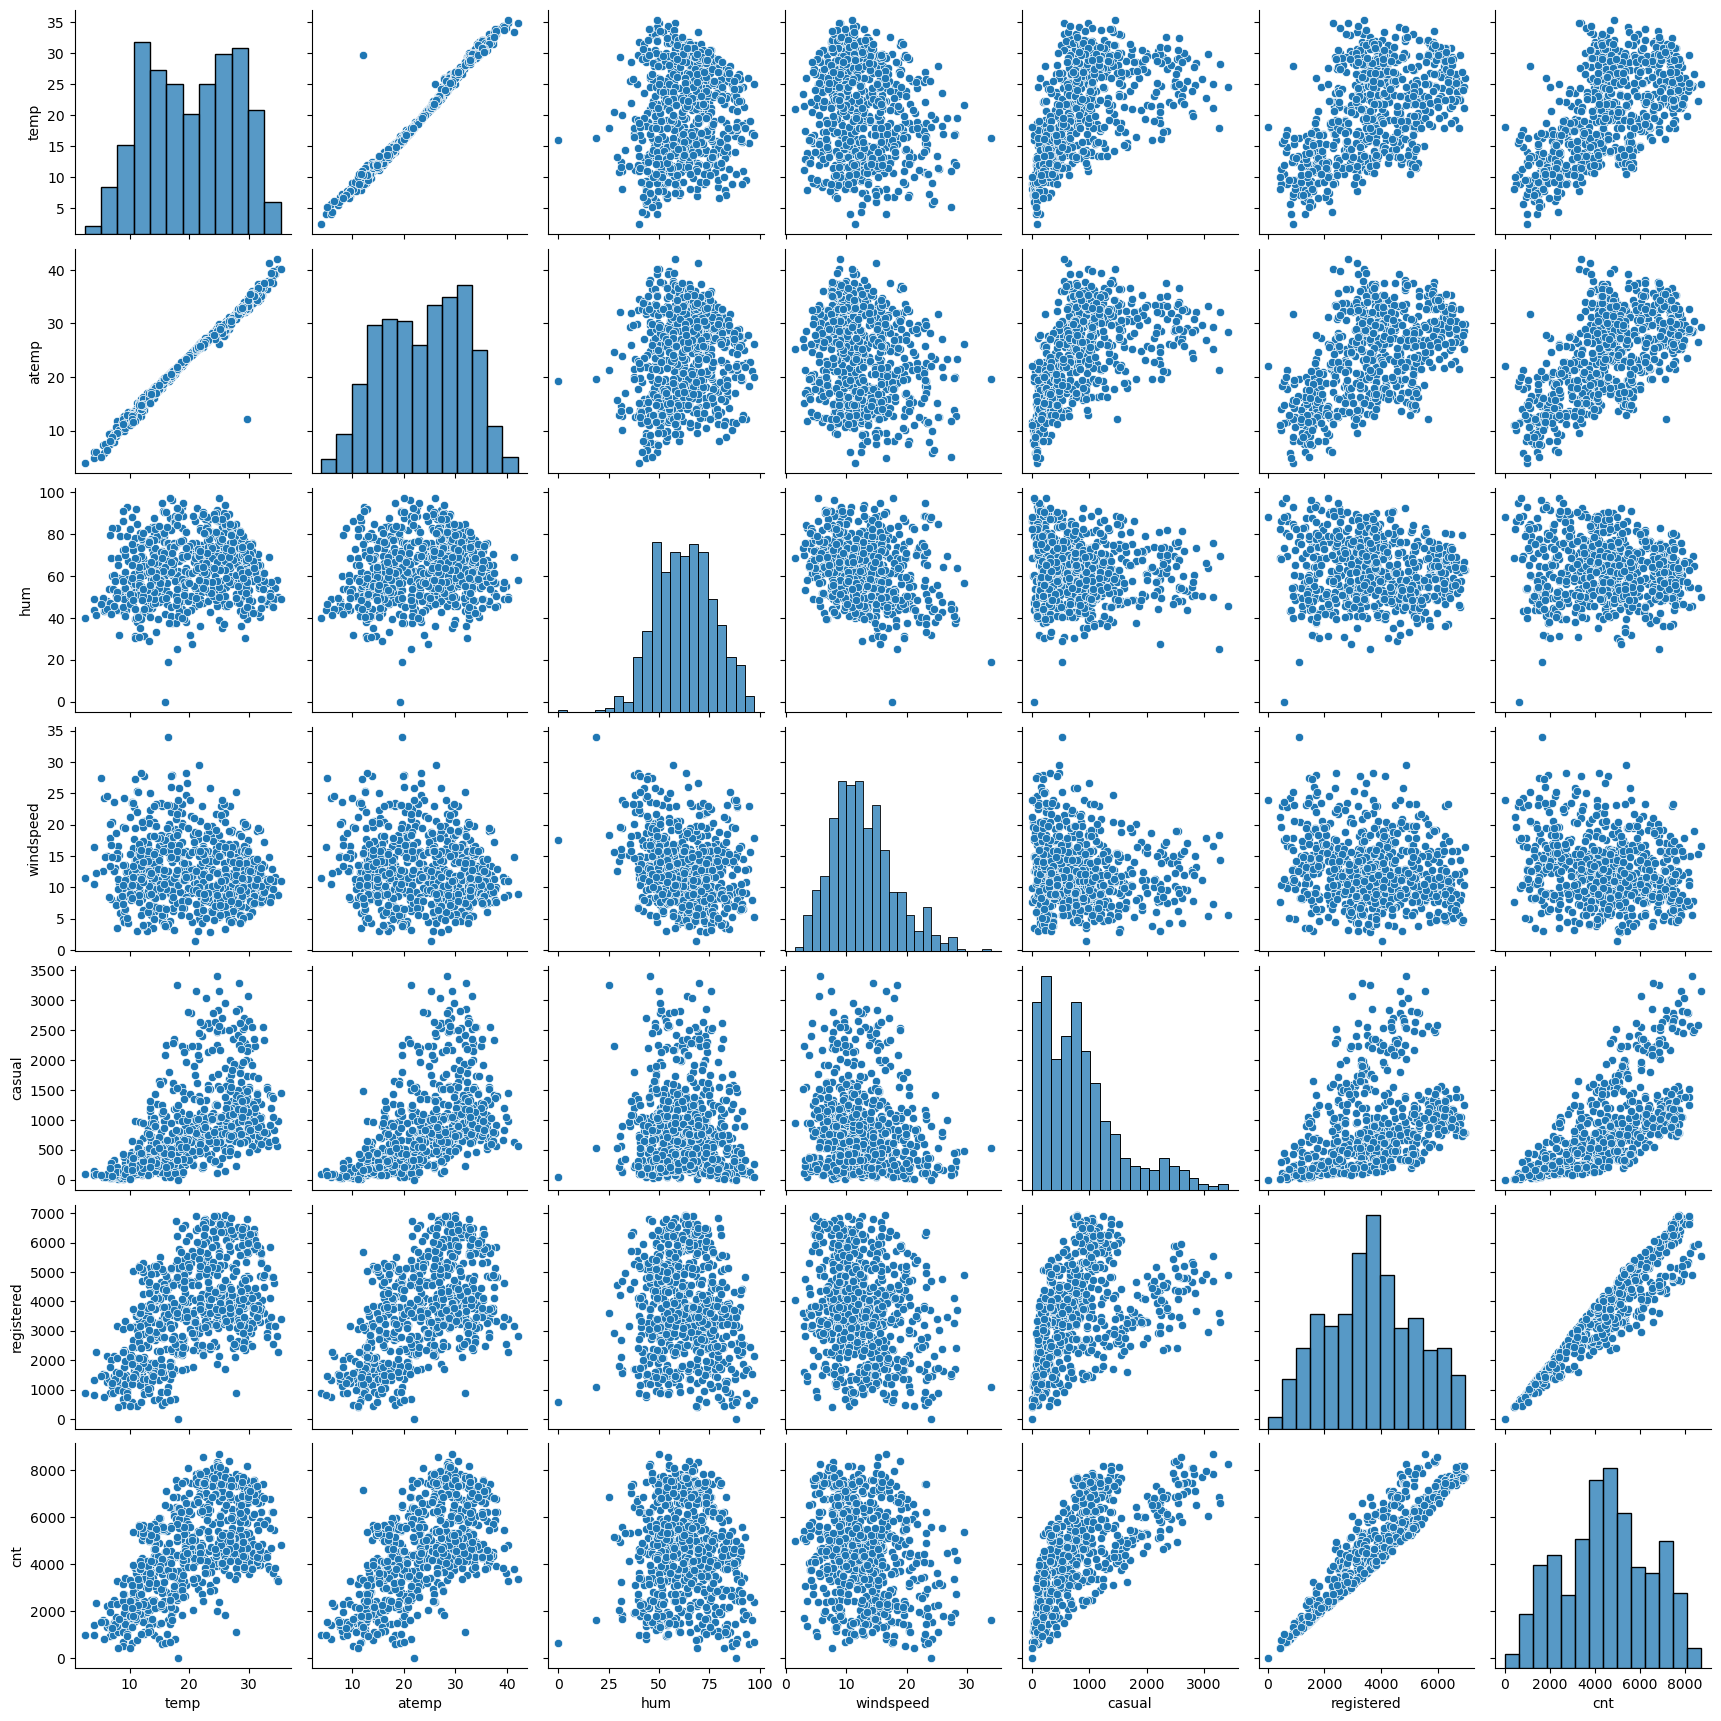

In [34]:
sns.pairplot(dataset_numeric)
plt.show()

In [35]:
cor=(dataset_numeric.corr())
cor

,temp,atemp,hum,windspeed,casual,registered,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411
cnt,0.627044,0.630685,-0.098543,-0.235132,0.672123,0.945411,1.000000


<Axes: >

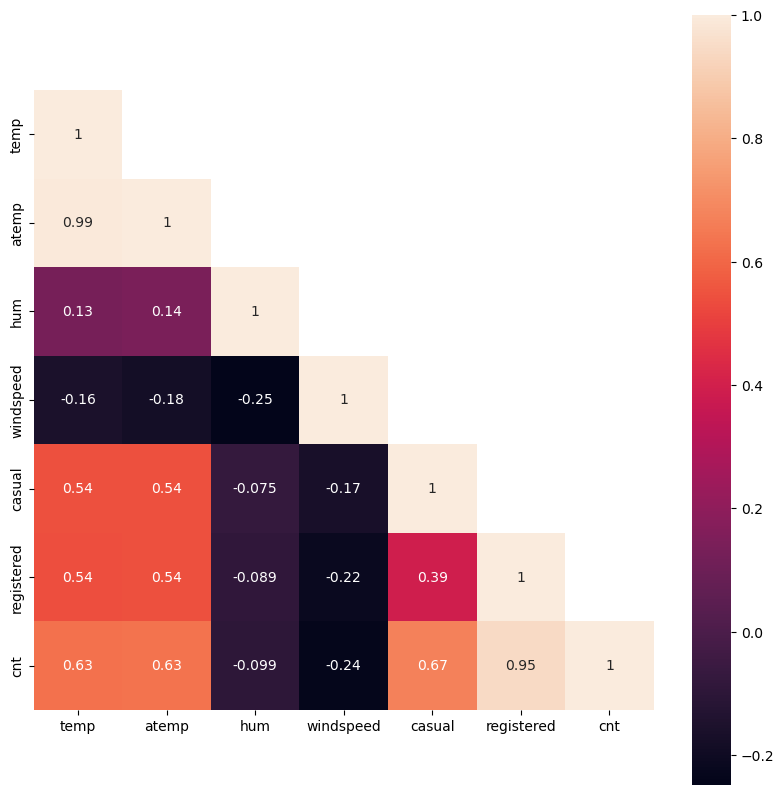

In [36]:
#heatmap
mask=np.array(cor)
mask[np.tril_indices_from(mask)]=False
fig,ax=plt.subplots()
fig.set_size_inches(10,10)
sns.heatmap(cor,mask=mask,vmax=1,square=True,annot=True)

In [37]:
#Removing atemp as it is highly corelated with temp
dataset.drop('atemp',axis=1,inplace=True)

In [38]:
dataset.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Sat,0,B,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-01-02,spring,0,Jan,0,Sun,0,B,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-01-03,spring,0,Jan,0,Mon,1,A,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-01-04,spring,0,Jan,0,Tue,1,A,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-01-05,spring,0,Jan,0,Wed,1,A,9.305237,43.6957,12.522300,82.0,1518.0,1600.0


## 3.Data Preparation


In [39]:
dataset_categorical=dataset.select_dtypes(include=['object'])

In [40]:
dataset_categorical.head()

,season,mnth,weekday,weathersit
0,spring,Jan,Sat,B
1,spring,Jan,Sun,B
2,spring,Jan,Mon,A
3,spring,Jan,Tue,A
4,spring,Jan,Wed,A


In [41]:
dataset_dummies=pd.get_dummies(dataset_categorical,drop_first=True,dtype=int)
dataset_dummies.head()

,season_spring,season_summer,season_winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
0,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [42]:
#Drop categorical variable columns
dataset= dataset.drop(list(dataset_categorical.columns),axis=1)
dataset

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0
1,2,2018-01-02,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0
2,3,2018-01-03,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0
3,4,2018-01-04,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0
4,5,2018-01-05,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...
725,726,2019-12-27,1,0,1,10.420847,65.2917,23.458911,247.0,1867.0,2114.0
726,727,2019-12-28,1,0,1,10.386653,59.0000,10.416557,644.0,2451.0,3095.0
727,728,2019-12-29,1,0,0,10.386653,75.2917,8.333661,159.0,1182.0,1341.0
728,729,2019-12-30,1,0,0,10.489153,48.3333,23.500518,364.0,1432.0,1796.0


In [43]:
#concatenate dummy variables with the dataset
dataset=pd.concat([dataset,dataset_dummies],axis=1)

In [44]:
dataset.head()

,instant,dteday,yr,holiday,workingday,temp,hum,windspeed,casual,registered,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
0,1,2018-01-01,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,...,0,0,0,1,0,0,0,0,1,0
1,2,2018-01-02,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,...,0,0,0,0,1,0,0,0,1,0
2,3,2018-01-03,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,...,0,0,1,0,0,0,0,0,0,0
3,4,2018-01-04,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,...,0,0,0,0,0,0,1,0,0,0
4,5,2018-01-05,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,...,0,0,0,0,0,0,0,1,0,0


In [45]:
dataset=dataset.drop(['instant','dteday'],axis=1,inplace=False)
dataset.head()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
0,0,0,0,14.110847,80.5833,10.749882,331.0,654.0,985.0,1,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,131.0,670.0,801.0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,120.0,1229.0,1349.0,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,108.0,1454.0,1562.0,1,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,43.6957,12.522300,82.0,1518.0,1600.0,1,...,0,0,0,0,0,0,0,1,0,0


## 4.Model building & evaluation

In [46]:
#import libs
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [47]:
#split the dataframe into train and test datasets
from sklearn.model_selection import train_test_split
np.random.seed(0)
df_train,df_test=train_test_split(dataset,train_size=0.7,test_size=0.3,random_state=100)

In [48]:
df_train

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,19.201653,55.8333,12.208807,922.0,6612.0,7534.0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,29.246653,70.4167,11.083475,968.0,6248.0,7216.0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,62.1250,10.792293,956.0,3110.0,4066.0,1,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,10.489153,48.3333,23.500518,364.0,1432.0,1796.0,1,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,1120.0,3100.0,4220.0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1,0,1,29.554153,58.7917,13.916771,1017.0,5647.0,6664.0,0,...,0,0,1,0,0,0,0,0,1,0
578,1,0,1,30.852500,65.9583,8.666718,983.0,6278.0,7261.0,0,...,0,0,0,0,0,1,0,0,0,0
53,0,0,1,9.091299,42.3043,6.305571,139.0,1778.0,1917.0,1,...,0,0,0,0,0,0,0,1,0,0
350,0,0,0,10.591653,56.0833,16.292189,275.0,2464.0,2739.0,0,...,0,0,0,1,0,0,0,0,1,0


In [49]:
from sklearn.preprocessing import MinMaxScaler


In [50]:
scaler= MinMaxScaler()

In [51]:
#apply scaler to all columns except dummy variables
var=["temp","hum","windspeed","registered","cnt"]
df_train[var] = scaler.fit_transform(df_train[var])

In [52]:
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,casual,registered,cnt,season_spring,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.650369,0.320768,837.543137,0.523944,0.513620,0.243137,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.343137,0.029412
std,0.500429,0.157763,0.468282,0.225844,0.145882,0.169797,675.921998,0.228175,0.224593,0.429398,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.538643,0.199179,311.000000,0.353487,0.356420,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.653714,0.296763,700.000000,0.525123,0.518638,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.754830,0.414447,1076.250000,0.696073,0.684710,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3283.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


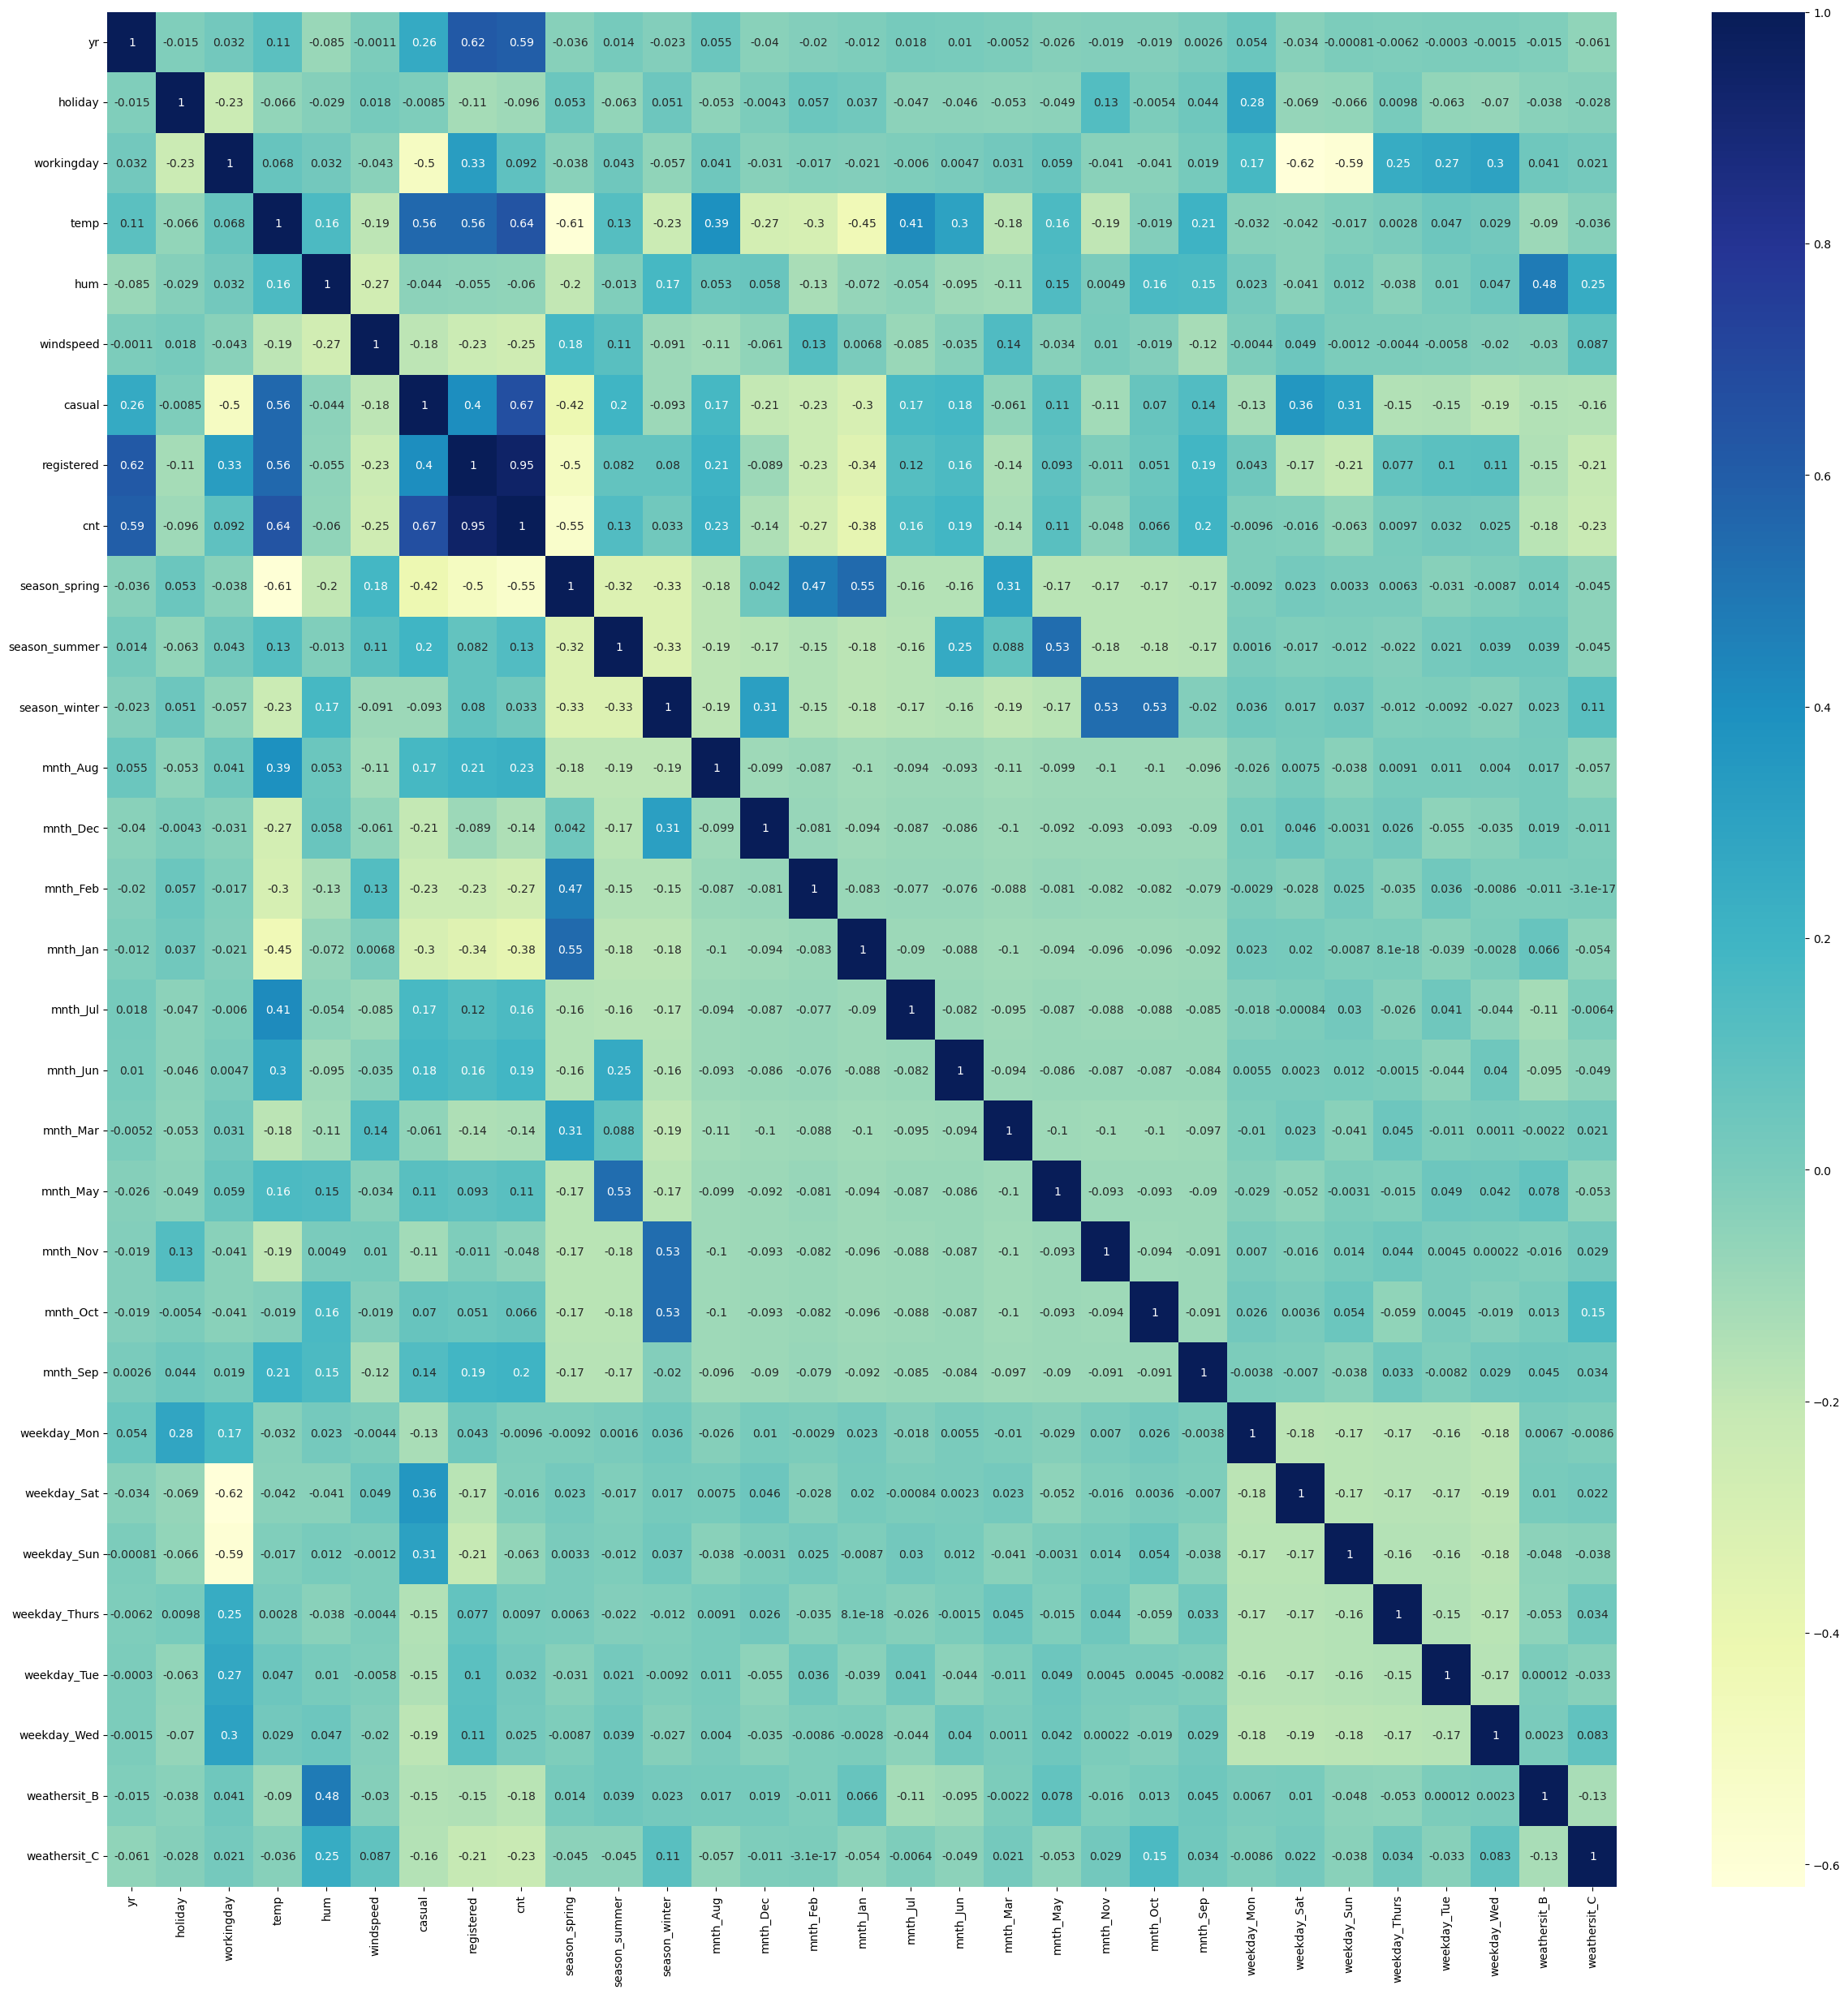

In [53]:
#checking the corelation coefficients to see which variables are highly corelated
plt.figure(figsize=(30,30))
sns.heatmap(df_train.corr(),annot=True,cmap="YlGnBu")
plt.show()

In [54]:

#diving into x and y
y_train=df_train.pop('cnt')
x_train = df_train.drop(["casual","registered"],axis=1)


In [55]:
x_train.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
653,1,0,1,0.509887,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.640189,0.255342,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,0,0.245101,0.498067,0.663106,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [56]:
np.asarray(df_train)


array([[1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 1., 0.]])

In [57]:
import statsmodels.api as sm
x_train = sm.add_constant(x_train)


In [60]:
lr = sm.OLS(y_train,x_train).fit()

In [61]:
lr.params

const            0.245085
yr               0.232116
holiday          0.009959
workingday       0.096884
temp             0.450562
hum             -0.151340
windspeed       -0.186453
season_spring   -0.048159
season_summer    0.038725
season_winter    0.105847
mnth_Aug         0.014404
mnth_Dec        -0.045586
mnth_Feb        -0.032282
mnth_Jan        -0.062777
mnth_Jul        -0.040350
mnth_Jun        -0.002972
mnth_Mar         0.001045
mnth_May         0.023940
mnth_Nov        -0.041851
mnth_Oct         0.007534
mnth_Sep         0.081060
weekday_Mon     -0.020907
weekday_Sat      0.096389
weekday_Sun      0.041853
weekday_Thurs   -0.009237
weekday_Tue     -0.018890
weekday_Wed     -0.005388
weathersit_B    -0.061066
weathersit_C    -0.257443
dtype: float64

In [62]:
lm=LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [63]:
print(lm.coef_)
print(lm.intercept_)

[ 9.53114350e-19  2.31521231e-01  1.42731266e+13  1.42731266e+13
  4.43833673e-01 -1.54380430e-01 -1.84138912e-01 -4.79885752e-02
  4.39876569e-02  1.02834135e-01  1.93427238e-02 -3.94422555e-02
 -3.65079285e-02 -5.50069242e-02 -3.21023700e-02 -1.54486661e-03
  8.98833954e-04  2.28316863e-02 -3.61713410e-02  1.56237824e-02
  8.95422949e-02 -1.78231580e-02  1.42731266e+13  1.42731266e+13
 -8.04188856e-03 -1.51775100e-02 -6.73218732e-03 -5.97433397e-02
 -2.59774988e-01]
-14273126572451.842


In [64]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     103.8
Date:                Tue, 07 Nov 2023   Prob (F-statistic):          8.74e-182
Time:                        23:52:16   Log-Likelihood:                 527.95
No. Observations:                 510   AIC:                            -999.9
Df Residuals:                     482   BIC:                            -881.3
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.2451      0.035      6.955      0.000       0.176       0.314
yr                0.2321      0.008     28.820      0.000       0.216       0.248
holiday           0.0100      0.024      0.415      0.678      -0.037       0.057
workingday        0.0969      0.012      7.905      0.000       0.073       0.121
temp              0.4506      0.046      9.734      0.000       0.360       0.542
hum              -0.1513      0.038     -3.933      0.000      -0.227      -0.076
windspeed        -0.1865      0.026     -7.257      0.000      -0.237      -0.136
season_spring    -0.0482      0.030     -1.607      0.109      -0.107       0.011
season_summer     0.0387      0.026      1.478      0.140      -0.013       0.090
season_winter     0.1058      0.028      3.794      0.000       0.051       0.161
mnth_Aug          0.0144      0.034      0.428      0.669      -0.052       0.081
mnth_Dec         -0.0456      0.034     -1.358      0.175      -0.112       0.020
mnth_Feb         -0.0323      0.033     -0.982      0.327      -0.097       0.032
mnth_Jan         -0.0628      0.034     -1.873      0.062      -0.129       0.003
mnth_Jul         -0.0404      0.035     -1.151      0.250      -0.109       0.029
mnth_Jun         -0.0030      0.025     -0.119      0.906      -0.052       0.046
mnth_Mar          0.0010      0.025      0.043      0.966      -0.047       0.049
mnth_May          0.0239      0.021      1.140      0.255      -0.017       0.065
mnth_Nov         -0.0419      0.036     -1.152      0.250      -0.113       0.030
mnth_Oct          0.0075      0.036      0.211      0.833      -0.063       0.078
mnth_Sep          0.0811      0.032      2.533      0.012       0.018       0.144
weekday_Mon      -0.0209      0.015     -1.366      0.173      -0.051       0.009
weekday_Sat       0.0964      0.014      7.029      0.000       0.069       0.123
weekday_Sun       0.0419      0.014      3.006      0.003       0.014       0.069
weekday_Thurs    -0.0092      0.016     -0.595      0.552      -0.040       0.021
weekday_Tue      -0.0189      0.015     -1.219      0.223      -0.049       0.012
weekday_Wed      -0.0054      0.015     -0.362      0.718      -0.035       0.024
weathersit_B     -0.0611      0.010     -5.854      0.000      -0.082      -0.041
weathersit_C     -0.2574      0.026     -9.778      0.000      -0.309      -0.206
==============================================================================
Omnibus:                       84.475   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              235.382
Skew:                          -0.804   Prob(JB):                     7.72e-52
Kurtosis:                       5.914   Cond. No.                     1.37e+16
================================================================

In [67]:
#import rfe
from sklearn.feature_selection import RFE


In [68]:
lm = LinearRegression()
rfe1= RFE(lm,step=15)
#fit with 15 feature
rfe1.fit(x_train,y_train)
print(rfe1.support_)
print(rfe1.ranking_)

[False  True  True  True  True  True  True  True False  True False False
 False  True False False False False False False  True False  True  True
 False False False  True  True]
[2 1 1 1 1 1 1 1 2 1 2 2 2 1 2 2 2 2 2 2 1 2 1 1 2 2 2 1 1]


In [69]:
coli= x_train.columns[rfe1.support_]

In [70]:
coli

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_winter', 'mnth_Jan', 'mnth_Sep', 'weekday_Sat',
       'weekday_Sun', 'weathersit_B', 'weathersit_C'],
      dtype='object')

In [71]:
x_train_rfe1 = x_train[coli]
x_train_lm=sm.add_constant(x_train_rfe1)
lm1= sm.OLS(y_train,x_train_rfe1).fit()
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     199.1
Date:                Wed, 08 Nov 2023   Prob (F-statistic):          2.98e-187
Time:                        00:13:53   Log-Likelihood:                 504.57
No. Observations:                 510   AIC:                            -981.1
Df Residuals:                     496   BIC:                            -921.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
yr                0.2334      0.008     28.418      0.000       0.217       0.249
holiday           0.2536      0.041      6.250      0.000       0.174       0.333
workingday        0.3550      0.032     11.229      0.000       0.293       0.417
temp              0.4109      0.030     13.819      0.000       0.352       0.469
hum              -0.1239      0.038     -3.265      0.001      -0.199      -0.049
windspeed        -0.1692      0.026     -6.519      0.000      -0.220      -0.118
season_spring    -0.1022      0.015     -6.599      0.000      -0.133      -0.072
season_winter     0.0529      0.013      4.203      0.000       0.028       0.078
mnth_Jan         -0.0469      0.018     -2.653      0.008      -0.082      -0.012
mnth_Sep          0.0723      0.015      4.695      0.000       0.042       0.103
weekday_Sat       0.3641      0.033     11.153      0.000       0.300       0.428
weekday_Sun       0.3096      0.033      9.261      0.000       0.244       0.375
weathersit_B     -0.0595      0.011     -5.586      0.000      -0.080      -0.039
weathersit_C     -0.2612      0.027     -9.797      0.000      -0.314      -0.209
==============================================================================
Omnibus:                       70.649   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.579
Skew:                          -0.698   Prob(JB):                     2.26e-40
Kurtosis:                       5.577   Cond. No.                         25.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [81]:
a= x_train_rfe1

In [82]:
#evaluating VIFs
vif= pd.DataFrame()
vif['features']=a.columns
vif['VIF']=[variance_inflation_factor(a.values,i)for i in range(a.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by="VIF",ascending = False)
vif



,features,VIF
2,workingday,41.44
10,weekday_Sat,10.12
11,weekday_Sun,9.80
3,temp,2.76
6,season_spring,2.71
1,holiday,2.57
4,hum,1.87
7,season_winter,1.81
12,weathersit_B,1.57
8,mnth_Jan,1.54


In [83]:
lm = LinearRegression()
rfe2= RFE (lm,step=7)
#fit with 15 feature
rfe2.fit(x_train,y_train)
print(rfe2.support_)
print(rfe2.ranking_)

[False  True  True False  True  True  True  True False  True False  True
 False  True  True False False False  True False  True False False False
 False False False  True  True]
[4 1 1 3 1 1 1 1 3 1 3 1 3 1 1 4 4 3 1 4 1 3 2 3 4 4 4 1 1]


In [84]:
col2= x_train.columns[rfe2.support_]
x_train_rfe2 = x_train[col2]
x_train_rfe2=sm.add_constant(x_train_rfe2)
lm2= sm.OLS(y_train,x_train_rfe2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     190.2
Date:                Wed, 08 Nov 2023   Prob (F-statistic):          7.80e-189
Time:                        00:36:08   Log-Likelihood:                 511.10
No. Observations:                 510   AIC:                            -992.2
Df Residuals:                     495   BIC:                            -928.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.3665      0.032     11.546      0.000       0.304       0.429
yr                0.2312      0.008     28.474      0.000       0.215       0.247
holiday          -0.0905      0.026     -3.517      0.000      -0.141      -0.040
temp              0.4345      0.033     13.169      0.000       0.370       0.499
hum              -0.1486      0.038     -3.936      0.000      -0.223      -0.074
windspeed        -0.1808      0.026     -7.015      0.000      -0.231      -0.130
season_spring    -0.1008      0.015     -6.537      0.000      -0.131      -0.071
season_winter     0.0737      0.014      5.216      0.000       0.046       0.102
mnth_Dec         -0.0455      0.017     -2.635      0.009      -0.079      -0.012
mnth_Jan         -0.0507      0.018     -2.810      0.005      -0.086      -0.015
mnth_Jul         -0.0720      0.017     -4.180      0.000      -0.106      -0.038
mnth_Nov         -0.0494      0.019     -2.664      0.008      -0.086      -0.013
mnth_Sep          0.0568      0.016      3.656      0.000       0.026       0.087
weathersit_B     -0.0574      0.011     -5.461      0.000      -0.078      -0.037
weathersit_C     -0.2538      0.026     -9.588      0.000      -0.306      -0.202
==============================================================================
Omnibus:                       67.521   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              176.080
Skew:                          -0.665   Prob(JB):                     5.82e-39
Kurtosis:                       5.553   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
b=x_train_rfe2.drop('const',axis=1)
vif1= pd.DataFrame()
vif1['features']=b.columns
vif1['VIF']=[variance_inflation_factor(b.values,i) for i in range(b.shape[1])]
vif1['VIF']=round(vif1['VIF'],2)
vif1=vif1.sort_values(by="VIF",ascending = False)
vif1

,features,VIF
3,hum,24.57
2,temp,16.83
4,windspeed,4.07
6,season_winter,2.97
5,season_spring,2.94
12,weathersit_B,2.26
0,yr,2.07
10,mnth_Nov,1.82
8,mnth_Jan,1.74
7,mnth_Dec,1.54


In [88]:
y_train_cnt= lm2.predict(x_train_rfe2)

<Axes: ylabel='Density'>

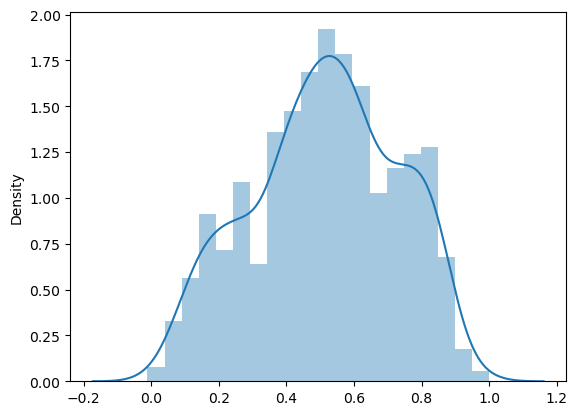

In [89]:
fig=plt.figure()
sns.distplot((y_train,y_train_cnt),bins=20)

In [90]:
df_test[var]=scaler.transform(df_test[var])

In [91]:
y_test=df_test.pop('cnt')
x_test=df_test.drop(["casual","registered"],axis=1)

In [92]:
x_test.head()

,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sep,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tue,weekday_Wed,weathersit_B,weathersit_C
184,0,1,0,0.831783,0.657364,0.084219,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.901354,0.610133,0.153728,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.837699,0.334206,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
221,0,0,1,0.881625,0.437098,0.339570,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.314298,0.537414,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [93]:
c= x_train_rfe2.drop('const',axis=1)

In [94]:
col2=c.columns

In [98]:
x_test_rfe2=x_test[col2]

In [99]:
x_test_rfe2=sm.add_constant(x_test_rfe2)

In [100]:
x_test_rfe2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 219 entries, 184 to 72
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   const          219 non-null    float64
 1   yr             219 non-null    int64  
 2   holiday        219 non-null    int64  
 3   temp           219 non-null    float64
 4   hum            219 non-null    float64
 5   windspeed      219 non-null    float64
 6   season_spring  219 non-null    int32  
 7   season_winter  219 non-null    int32  
 8   mnth_Dec       219 non-null    int32  
 9   mnth_Jan       219 non-null    int32  
 10  mnth_Jul       219 non-null    int32  
 11  mnth_Nov       219 non-null    int32  
 12  mnth_Sep       219 non-null    int32  
 13  weathersit_B   219 non-null    int32  
 14  weathersit_C   219 non-null    int32  
dtypes: float64(4), int32(9), int64(2)
memory usage: 19.7 KB


In [101]:
y_pred=lm2.predict(x_test_rfe2)

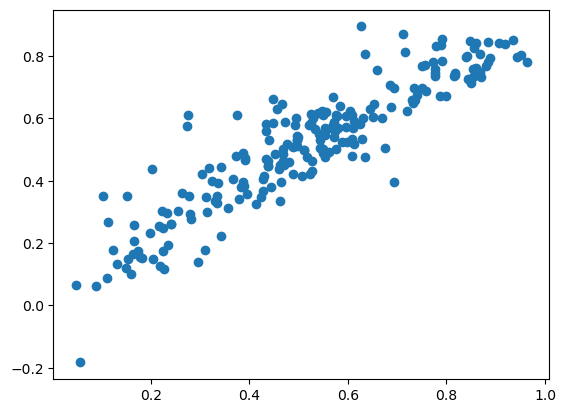

In [103]:
plt.figure()
plt.scatter(y_test,y_pred)

In [104]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8251351742683386

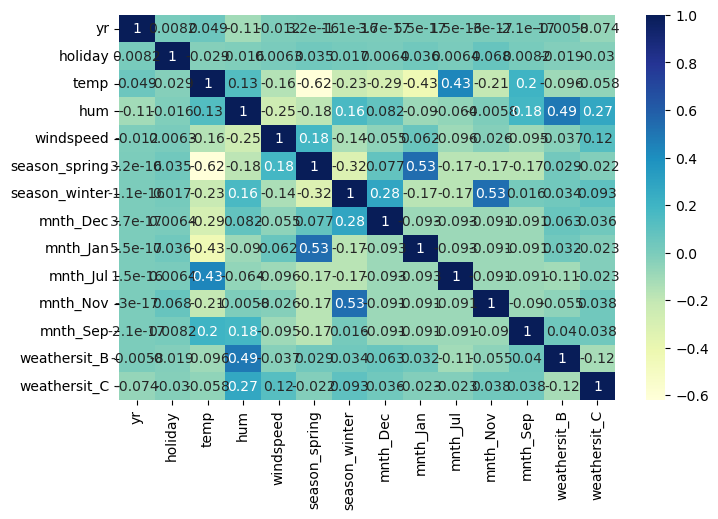

In [106]:
plt.figure(figsize=(8,5))
sns.heatmap(dataset[col2].corr(),cmap="YlGnBu",annot=True)
plt.show()